In [1]:
import pandas as pd,numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 

In [2]:
#import danych
train_data = pd.read_csv("C:\\PycharmProjects\\DataScience\\Bootcamp\\Projekt_koncowy\\dane\\churnTrain.csv")

In [3]:
#Preprocessing

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3333 non-null   object 
 1   Account_Length       3333 non-null   int64  
 2   Area_Code            3333 non-null   int64  
 3   Phone_No             3333 non-null   int64  
 4   International_Plan   3333 non-null   object 
 5   Voice_Mail_Plan      3333 non-null   object 
 6   No_Vmail_Messages    3333 non-null   int64  
 7   Total_Day_minutes    3333 non-null   float64
 8   Total_Day_Calls      3333 non-null   int64  
 9   Total_Day_charge     3333 non-null   float64
 10  Total_Eve_Minutes    3333 non-null   float64
 11  Total_Eve_Calls      3333 non-null   int64  
 12  Total_Eve_Charge     3333 non-null   float64
 13  Total_Night_Minutes  3333 non-null   float64
 14  Total_Night_Calls    3333 non-null   int64  
 15  Total_Night_Charge   3333 non-null   f

### Analiza eksploracyjna

In [5]:
#dane liczbowe
numeric_vars = train_data.drop(['Phone_No','Churn','Area_Code'],axis=1).select_dtypes(include=np.number).columns
numeric_vars

Index(['Account_Length', 'No_Vmail_Messages', 'Total_Day_minutes',
       'Total_Day_Calls', 'Total_Day_charge', 'Total_Eve_Minutes',
       'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes',
       'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'No_CS_Calls'],
      dtype='object')

### Dane kategoryczne

In [6]:
category_vars = ['State', 'Area_Code', 'International_Plan', 'Voice_Mail_Plan']
train_data[category_vars].head()

,State,Area_Code,International_Plan,Voice_Mail_Plan
0,KS,415,no,yes
1,OH,415,no,yes
2,NJ,415,no,no
3,OH,408,yes,no
4,OK,415,yes,no


In [7]:
train_data[numeric_vars].describe()

,Account_Length,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
train_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

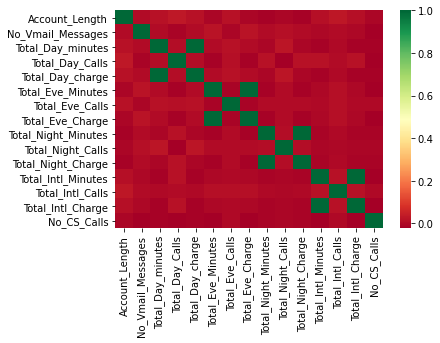

In [9]:
#korelacja pomiedzy liczbowymi zmiennymi  objaśniajacymi
sns.heatmap(train_data[numeric_vars].corr('spearman'),cmap='RdYlGn')

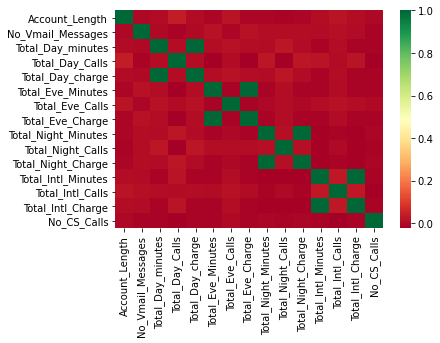

In [10]:
sns.heatmap(train_data[numeric_vars].corr('pearson'),cmap='RdYlGn')

In [11]:
train_data[numeric_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Account_Length       3333 non-null   int64  
 1   No_Vmail_Messages    3333 non-null   int64  
 2   Total_Day_minutes    3333 non-null   float64
 3   Total_Day_Calls      3333 non-null   int64  
 4   Total_Day_charge     3333 non-null   float64
 5   Total_Eve_Minutes    3333 non-null   float64
 6   Total_Eve_Calls      3333 non-null   int64  
 7   Total_Eve_Charge     3333 non-null   float64
 8   Total_Night_Minutes  3333 non-null   float64
 9   Total_Night_Calls    3333 non-null   int64  
 10  Total_Night_Charge   3333 non-null   float64
 11  Total_Intl_Minutes   3333 non-null   float64
 12  Total_Intl_Calls     3333 non-null   int64  
 13  Total_Intl_Charge    3333 non-null   float64
 14  No_CS_Calls          3333 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 

Column: Account_Length
kurtoza: -0.10947391843415755
skosność: 0.09656281161489656
Unique values: 212
Column: No_Vmail_Messages
kurtoza: -0.05285151059052451
skosność: 1.2642543349768245
Unique values: 46
Column: Total_Day_minutes
kurtoza: -0.021710117924088834
skosność: -0.029063979518119797
Unique values: 1667
Column: Total_Day_Calls
kurtoza: 0.24101722895174227
skosność: -0.11173632373075189
Unique values: 119
Column: Total_Day_charge
kurtoza: -0.021581719145033595
skosność: -0.02907017792703775
Unique values: 1667
Column: Total_Eve_Minutes
kurtoza: 0.0237916804447047
skosność: -0.023866708804637538
Unique values: 1611
Column: Total_Eve_Calls
kurtoza: 0.20404769217448226
skosność: -0.05553813000161922
Unique values: 123
Column: Total_Eve_Charge
kurtoza: 0.02364954586272594
skosność: -0.023847250496276968
Unique values: 1440
Column: Total_Night_Minutes
kurtoza: 0.08388775499253365
skosność: 0.008917275580987895
Unique values: 1591
Column: Total_Night_Calls
kurtoza: -0.073711224212588

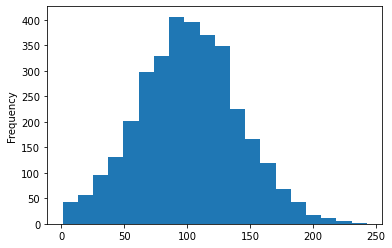

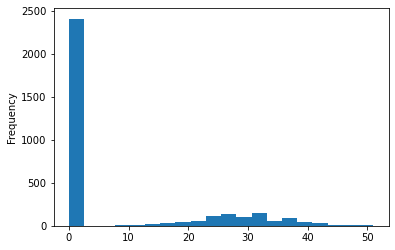

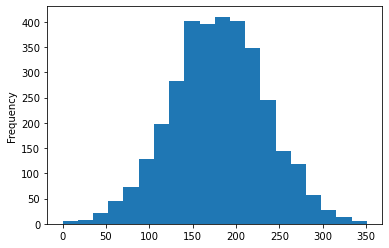

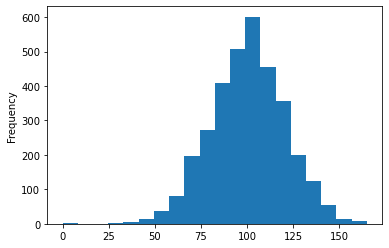

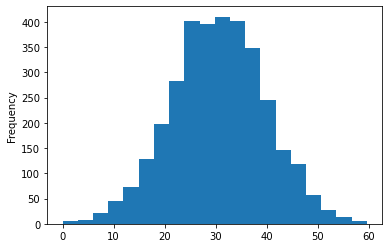

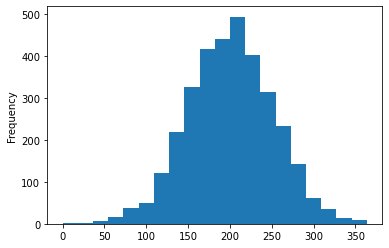

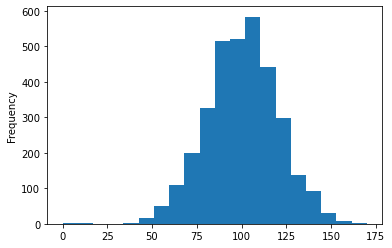

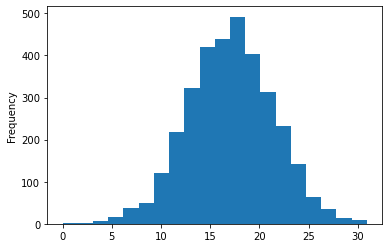

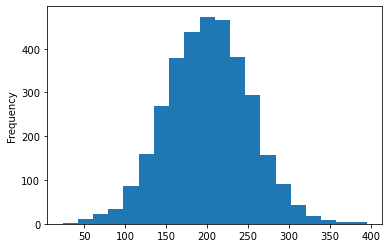

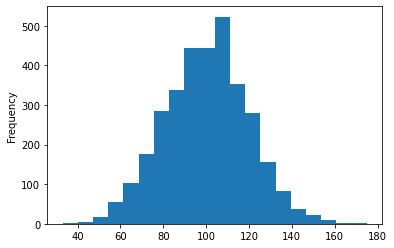

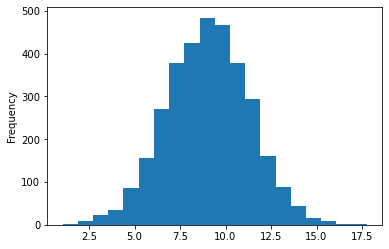

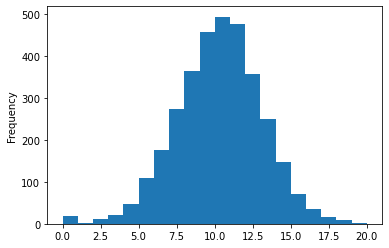

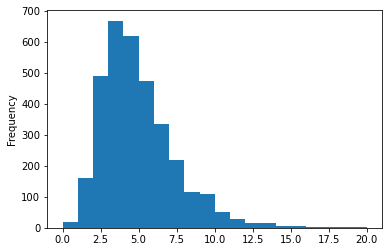

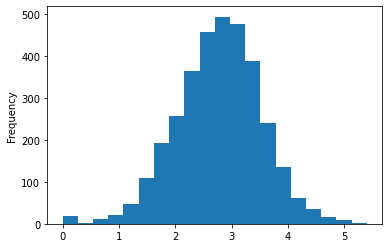

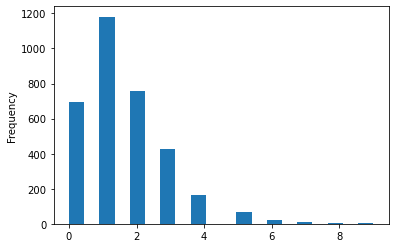

In [12]:
# rozkład zmiennych liczbowych
for column in numeric_vars:
    print(f'Column: {column}')
    print( 'kurtoza: {}'.format( kurtosis(train_data[column]) ))
    print( 'skosność: {}'.format( skew(train_data[column]) ))
    print(f'Unique values: {len(train_data[column].unique())}')
    train_data[column].plot.hist(bins=20)
    plt.show()
    
skew_vars=['No_CS_Calls','Total_Intl_Calls','No_Vmail_Messages']

### Zmiene kategoryczne

Columns: State
Unique values: 51
Columns: Area_Code
Unique values: 3
Columns: International_Plan
Unique values: 2
Columns: Voice_Mail_Plan
Unique values: 2


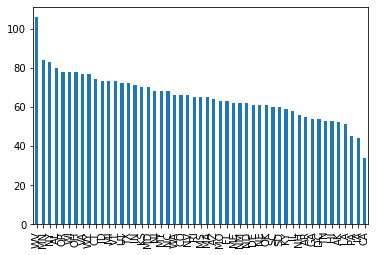

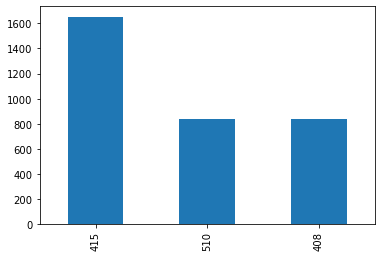

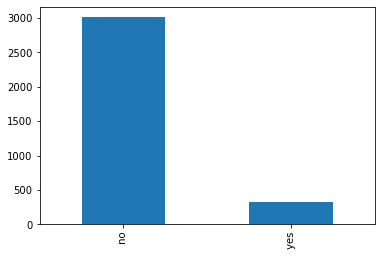

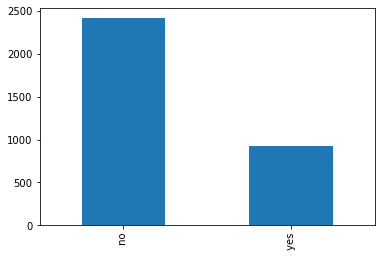

In [14]:
for column in category_vars:
    print(f'Columns: {column}')
    print(f'Unique values: {len(train_data[column].unique())}')
    train_data[column].value_counts().plot.bar()
    plt.show()

### Brakujace dane

In [15]:
train_data.isnull().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3333 non-null   object 
 1   Account_Length       3333 non-null   int64  
 2   Area_Code            3333 non-null   int64  
 3   Phone_No             3333 non-null   int64  
 4   International_Plan   3333 non-null   object 
 5   Voice_Mail_Plan      3333 non-null   object 
 6   No_Vmail_Messages    3333 non-null   int64  
 7   Total_Day_minutes    3333 non-null   float64
 8   Total_Day_Calls      3333 non-null   int64  
 9   Total_Day_charge     3333 non-null   float64
 10  Total_Eve_Minutes    3333 non-null   float64
 11  Total_Eve_Calls      3333 non-null   int64  
 12  Total_Eve_Charge     3333 non-null   float64
 13  Total_Night_Minutes  3333 non-null   float64
 14  Total_Night_Calls    3333 non-null   int64  
 15  Total_Night_Charge   3333 non-null   f

## Outliers

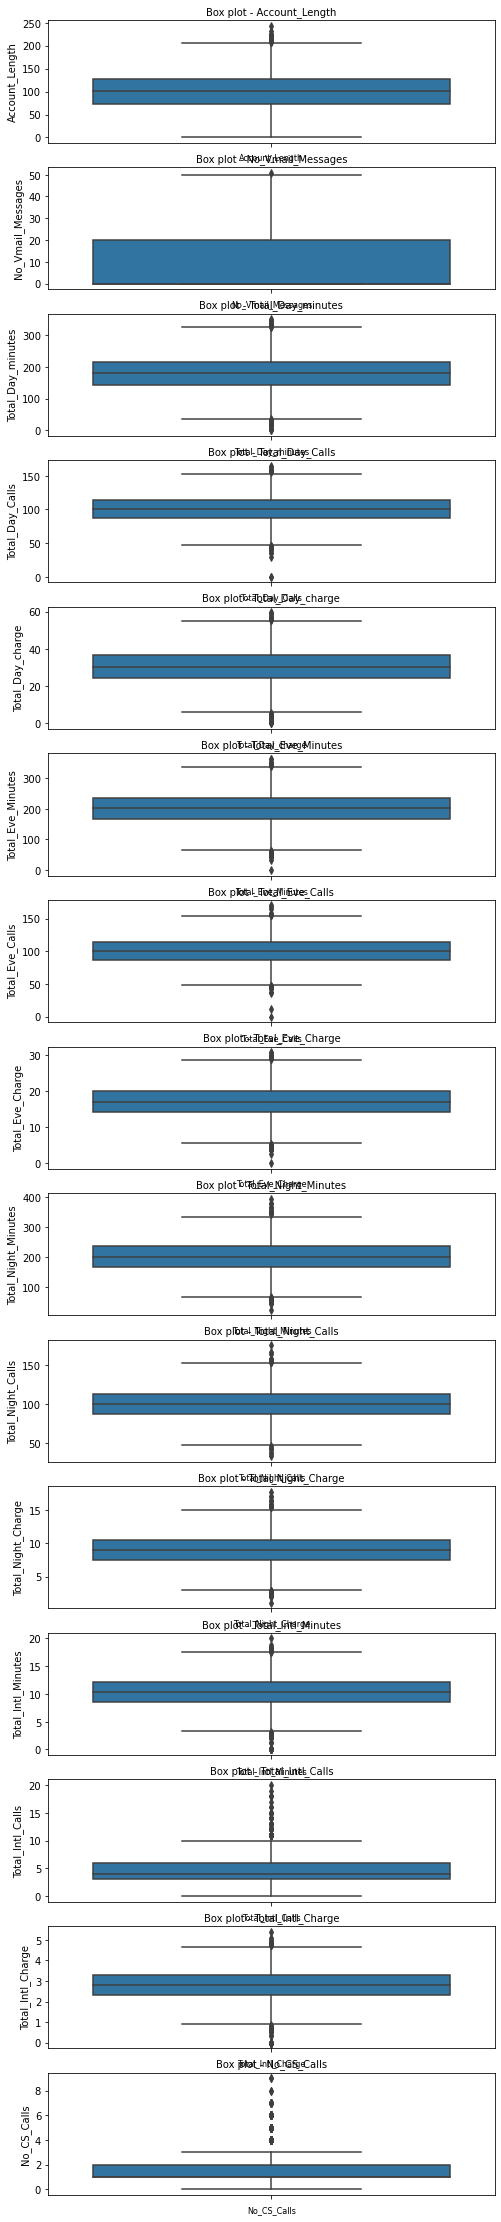

In [17]:
fig, ax = plt.subplots(len(numeric_vars), figsize=(8,40))

for i, col_val in enumerate(numeric_vars):

    sns.boxplot(y=train_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

### Wnioski:
* Nie wystepują braki danych
* Występuja zmienne objaśniające silnie ze soba skorelowane(opłata i zużyte minuty).
* Część zmiennych ma rozkład skośny.
* Kolumny typu bool powinny byc zamienione na 1 i 0.
* Kolumny kategoryczne powinny być zakodowane przy uzyciu liczb.
* Należy usunąć lub dostosować wartości odstające.
* Numer  telefonu jest identyfikatorem
* Grupy są nie zbalansowane
    

##  Preprocessing

In [18]:
## Zamiana zmiennych typu bool na wartosci liczbowe
train_data['Churn'] = train_data['Churn'].astype(int)
for cat_var in category_vars:
    print(cat_var)
    train_data[cat_var] = train_data[cat_var].astype('category')
train_data['International_Plan'] = train_data['International_Plan'].replace((' yes', ' no'), (1, 0))
train_data['Voice_Mail_Plan'] = train_data['Voice_Mail_Plan'].replace((' yes', ' no'), (1, 0))

State
Area_Code
International_Plan
Voice_Mail_Plan


In [19]:
taget_sr=pd.DataFrame()
taget_sr=train_data['Churn']
## Zamiana zmiennych kategorycznych na wartosci liczbowe
# kategoria nominalna z 51 wartościami, one hot zwiększyłby znacznie ilość wymiarów
ce_hash=ce.HashingEncoder(cols=['State'])
train_data=ce_hash.fit_transform(train_data.drop('Churn',axis=1),train_data['Churn'])
#train_data=ce_hash.fit_transform(train_data,train_data)

In [20]:
train_data['Churn']=taget_sr
train_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account_Length,Area_Code,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,0,0,0,1,0,0,0,107,415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [21]:
train_data=pd.get_dummies(train_data, columns=['Area_Code'], prefix = ['Area'],drop_first=True)

In [22]:
train_data.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'Account_Length', 'Phone_No', 'International_Plan', 'Voice_Mail_Plan',
       'No_Vmail_Messages', 'Total_Day_minutes', 'Total_Day_Calls',
       'Total_Day_charge', 'Total_Eve_Minutes', 'Total_Eve_Calls',
       'Total_Eve_Charge', 'Total_Night_Minutes', 'Total_Night_Calls',
       'Total_Night_Charge', 'Total_Intl_Minutes', 'Total_Intl_Calls',
       'Total_Intl_Charge', 'No_CS_Calls', 'Churn', 'Area_415', 'Area_510'],
      dtype='object')

In [46]:
# korekta o skorelowne zmienne objasniajace
numeric_vars = train_data.drop(['Phone_No','Churn','Total_Day_charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'],axis=1).select_dtypes(include=np.number).columns

In [69]:
#Podział na dane treningowe i testowe
X_train,X_test,y_train,y_test=train_test_split(train_data.drop(['Phone_No','Churn','Total_Day_charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'],axis=1),train_data['Churn'],test_size=0.25,random_state=42)


#undersampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_train, y_train =undersample.fit_resample(X_train, y_train)
#print('Random undersampling {}'.format(Counter(y_train)))

oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train =oversample.fit_resample(X_train, y_train)
print('Random oversampling {}'.format(Counter(y_train)))


Random oversampling Counter({0: 2141, 1: 2141})


In [70]:
# transformers
class RemoveOutliersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.boundaries = {}
        
    def fit( self, X, y = None ):
        for col in X:
            iqr = np.nanpercentile(X[col], 75) - np.nanpercentile(X[col], 25)
            lower, upper = (np.nanpercentile(X[col], 25) - 1.5 * iqr), (np.nanpercentile(X[col], 75) + 1.5 * iqr)
            self.boundaries[col] = [lower, upper]   
        return self 
    
    def transform( self, X, y = None ):
        for col in X:
            X.loc[X[col] < self.boundaries[col][0], col] = self.boundaries[col][0]
            X.loc[X[col] > self.boundaries[col][1], col] = self.boundaries[col][1]
        return X

In [71]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__( self):
        pass
        
    def fit(self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        def log_transform(x):
            return 0 if x==0 else np.log(x)
        
        X = pd.DataFrame(X)
        for col in X:
            X[col] = X[col].apply(log_transform)
        return X

In [72]:
transformer_skew = Pipeline(steps=[
    ('remove_outliers', RemoveOutliersTransformer()), 
    ('log_transform', LogTransformer()),
    ('scale_data', StandardScaler())
])
transformer_num = Pipeline(steps=[
    ('remove_outliers', RemoveOutliersTransformer()), 
    ('scale_data', StandardScaler())
])

transformer = ColumnTransformer(transformers=[
    ('num_1', transformer_num, numeric_vars),
    ('num_2', transformer_skew, skew_vars)
])

In [73]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### 1. SVC lin

In [74]:
pipe_lin_svc = Pipeline([('preprocessing', transformer), ('classifier', LinearSVC(C=1,max_iter = 3000))])

param_grid_lin_svc = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,1000]
}

grid_lin_svc = GridSearchCV(pipe_lin_svc, param_grid_lin_svc, cv=kfold, return_train_score=True)

grid_lin_svc.fit(X_train, y_train)
grid_lin_svc.best_params_

c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to conver

{'classifier__C': 0.01}

### 2. SVC 

In [75]:
pipe_svc = Pipeline([('preprocessing', transformer), ('classifier', SVC(C=1,max_iter = 3000, probability=True))])

param_grid_svc = {
            'classifier__C': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=kfold, return_train_score=True)

grid_svc.fit(X_train, y_train)
grid_svc.best_params_

c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

{'classifier__C': 1, 'classifier__gamma': 1}

### 3. Logistic regression

In [76]:
pipe_log_reg = Pipeline([('preprocessing', transformer), ('classifier', LogisticRegression(C=1,max_iter = 1000))])

param_grid_log_reg = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_log_reg = GridSearchCV(pipe_log_reg, param_grid_log_reg, cv=kfold, return_train_score=True)

grid_log_reg.fit(X_train, y_train)
grid_log_reg.best_params_

{'classifier__C': 1}

### 4. KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline([('preprocessing', transformer), 
                     ('classifier', KNeighborsClassifier(n_neighbors=2, metric='euclidean'))])

param_grid_KNN = {
            'classifier__n_neighbors': [2, 5, 10, 11,12],
            'classifier__metric': ['euclidean', 'cityblock', 'cosine']
}

grid_KNN = GridSearchCV(pipe_KNN, param_grid_KNN, cv=kfold, return_train_score=True)

grid_KNN.fit(X_train, y_train)
grid_KNN.best_params_

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 2}

### 5. Dtree

In [78]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('preprocessing', transformer), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_DT = {
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}

grid_DT = GridSearchCV(pipe_DT, param_grid_DT, cv=kfold, return_train_score=True)

grid_DT.fit(X_train, y_train)
grid_DT.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 5}

### 6. Bagging

In [79]:
pipe_bag = Pipeline([('preprocessing', transformer), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_bag = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_bag = GridSearchCV(pipe_bag, param_grid_bag, cv=kfold, return_train_score=True)

grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

### 7. RFC

In [80]:
from sklearn.ensemble import RandomForestClassifier

pipe_RFC = Pipeline([('preprocessing', transformer), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_RFC = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_RFC = GridSearchCV(pipe_RFC, param_grid_RFC, cv=kfold, return_train_score=True)

grid_RFC.fit(X_train, y_train)
grid_RFC.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

### 8. ETC

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

pipe_ETC = Pipeline([('preprocessing', transformer), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_ETC = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_ETC = GridSearchCV(pipe_ETC, param_grid_ETC, cv=kfold, return_train_score=True)

grid_ETC.fit(X_train, y_train)
grid_ETC.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

### 9. GBC

In [82]:
pipe_GBC = Pipeline([('preprocessing', transformer), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_GBC = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.8, 1]
             }

grid_GBC = GridSearchCV(pipe_GBC, param_grid_GBC, cv=kfold, return_train_score=True)

grid_GBC.fit(X_train, y_train)
grid_GBC.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 200}

### 10. XGBC

In [83]:
pipe_XGBC = Pipeline([('preprocessing', transformer), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])
param_grid_XGBC = {
    'classifier__max_depth': randint(3, 11),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__min_child_weight': randint(1, 11)
}

grid_XGBC = RandomizedSearchCV(n_iter=100,estimator=pipe_XGBC, 
                             param_distributions=param_grid_XGBC, 
                      cv=kfold, 
                      return_train_score=True)

grid_XGBC.fit(X_train, y_train)
grid_XGBC.best_params_

{'classifier__colsample_bytree': 0.648651539909966,
 'classifier__gamma': 0.4468459611452211,
 'classifier__learning_rate': 0.09923586624728528,
 'classifier__max_depth': 10,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 208,
 'classifier__subsample': 0.6500099950106034}

### 11. Voting

In [85]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
                ('grid_5', grid_DT.best_estimator_), 
                ('grid_6', grid_bag.best_estimator_), 
                ('grid_8', grid_ETC.best_estimator_),
                ('grid_9', grid_GBC.best_estimator_),
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('grid_5',
                              Pipeline(steps=[('preprocessing',
                                               ColumnTransformer(transformers=[('num_1',
                                                                                Pipeline(steps=[('remove_outliers',
                                                                                                 RemoveOutliersTransformer()),
                                                                                                ('scale_data',
                                                                                                 StandardScaler())]),
                                                                                Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'Account_Length', 'International_Plan', 'Voice_Mail_Plan',
       'No_Vmail_Me...
       'No_CS_Calls', 'Area_415', 'Area_510'],
      dtype='object')),
                

In [86]:
models = []
models.append(('SVM linear', grid_lin_svc.best_estimator_))
models.append(('SVM rbf', grid_svc.best_estimator_))
models.append(('LR', grid_log_reg.best_estimator_))
models.append(('KNN', grid_KNN.best_estimator_))
models.append(('DecisionTreeClassifier', grid_DT.best_estimator_))
models.append(('BaggingClassifier', grid_bag.best_estimator_))
models.append(('RandomForestClassifier', grid_RFC.best_estimator_))
models.append(('ExtraTrees', grid_ETC.best_estimator_))
models.append(('GrBoos', grid_GBC.best_estimator_))
models.append(('R GrBoos', grid_XGBC.best_estimator_))
models.append(('voting_clf', voting_clf))

In [87]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

SVM linear
precision_score: 0.3
recall_score: 0.72
f1_score: 0.4235294117647059
accuracy_score: 0.7062350119904077
roc_auc_score: 0.7766431593794076
SVM rbf
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0
accuracy_score: 0.8501199040767387
roc_auc_score: 0.7594471086036672
LR
precision_score: 0.3023255813953488
recall_score: 0.728
f1_score: 0.4272300469483568
accuracy_score: 0.7074340527577938
roc_auc_score: 0.7768349788434414
KNN
precision_score: 0.40963855421686746
recall_score: 0.272
f1_score: 0.3269230769230769
accuracy_score: 0.8321342925659473
roc_auc_score: 0.651018335684062
DecisionTreeClassifier
precision_score: 0.40969162995594716
recall_score: 0.744
f1_score: 0.5284090909090908
accuracy_score: 0.8009592326139089
roc_auc_score: 0.7740761636107194
BaggingClassifier
precision_score: 0.43781094527363185
recall_score: 0.704
f1_score: 0.5398773006134969
accuracy_score: 0.8201438848920863
roc_auc_score: 0.8322538787023976
RandomForestClassifier
precision_score: 0.4806629834254

c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\pycharmprojects\datascience\venv64\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear','SVM rbf','LR','KNN','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier', 'ExtraTrees','GrBoost', 'xGrBoost','voting'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM linear,0.300000,0.720,0.423529,0.706235,0.776643
1,SVM rbf,0.000000,0.000,0.000000,0.850120,0.759447
2,LR,0.302326,0.728,0.427230,0.707434,0.776835
3,KNN,0.409639,0.272,0.326923,0.832134,0.651018
4,DecisionTreeClassifier,0.409692,0.744,0.528409,0.800959,0.774076
5,BaggingClassifier,0.437811,0.704,0.539877,0.820144,0.832254
6,RandomForestClassifier,0.480663,0.696,0.568627,0.841727,0.871018
7,ExtraTrees,0.487500,0.624,0.547368,0.845324,0.841128
8,GrBoost,0.614679,0.536,0.572650,0.880096,0.827915
9,xGrBoost,0.760870,0.560,0.645161,0.907674,0.865557


SVM linear
SVM rbf
LR
KNN
DecisionTreeClassifier
BaggingClassifier
RandomForestClassifier
ExtraTrees
GrBoos
R GrBoos
voting_clf


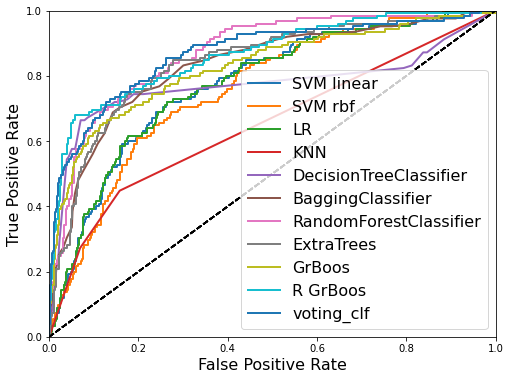

In [89]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()
    

Najlepsze wyniki uzuskuje model XGradientBoost przy AUROC odpowiednio na poziomie [0,86] , f1_score [0.65] oraz accuracy [0.91].
Oversampling daje znacznie lepsze wyniki od undersamplingu, jednak istnieje możliwość polepszenia wyników przy zastosowaniu innych metod resampligu.